In [10]:
! git clone https://github.com/rixprakash/ds3001group

fatal: destination path 'ds3001group' already exists and is not an empty directory.


In [ ]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in files

poverty = pd.read_csv("/content/ds3001group/arizona/azpoverty.csv")
outcomes = pd.read_excel("/content/ds3001group/arizona/arizonaoutcomes.xlsx")
outcomes2012 = outcomes[outcomes['year'] == 2012]
outcomes2016 = outcomes[outcomes['year'] == 2016]
outcomes2020 = outcomes[outcomes['year'] == 2020]
azdemographics2012 = pd.read_excel("/content/ds3001group/arizona/azdemographics0812.xlsx")
azdemographics2016 = pd.read_excel("")
azdemographics2020 = pd.read_excel("")
azdemographics2012.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,MANUALQXSE007,QX6E001,QX7E001,QX7E002,QX7E003,QX8E001,QX8E002,QX8E003,QZTE001,QZ6E001
0,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,County Subdivision Code,...,Not in labor force,Total,Total,Occupied,Vacant,Total,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
1,G0400010,2008-2012,AZ,NaN,NaN,Arizona,4,Apache County,1,NaN,...,0.547029,32548,32548,19035,13513,19035,14513,4522,524,85200
2,G0400030,2008-2012,AZ,NaN,NaN,Arizona,4,Cochise County,3,NaN,...,0.461909,59160,59160,49220,9940,49220,33743,15477,763,151800
3,G0400050,2008-2012,AZ,NaN,NaN,Arizona,4,Coconino County,5,NaN,...,0.332926,63270,63270,45718,17552,45718,27791,17927,950,237200
4,G0400070,2008-2012,AZ,NaN,NaN,Arizona,4,Gila County,7,NaN,...,0.533112,32644,32644,20245,12399,20245,15494,4751,722,140500


In [ ]:
# Wrangling

poverty['Percent in Poverty'].unique()
poverty['Percent in Poverty'].value_counts()
poverty['Percent in Poverty'].isnull().sum() # No missing values


0

In [ ]:
# Matching column names of files to merge
poverty['Name'] = poverty['Name'].str.replace(' County', '')
poverty['Name'] = poverty['Name'].str.upper()

In [ ]:
# Merge outcomes2020 with poverty
# Problem: poverty has years beyond just 2020, need to merge only with 2020 rows

poverty2020 = poverty[poverty['Year'] == 2020]
merged_df2020 = pd.merge(poverty2020, outcomes2020, left_on='Name', right_on='county_name', how='outer')
merged_df2020 = merged_df2020.iloc[2:].reset_index(drop=True)

poverty2016 = poverty[poverty['Year'] == 2016]
merged_df2016 = pd.merge(poverty2016, outcomes2016, left_on='Name', right_on='county_name', how='outer')
merged_df2016 = merged_df2016.iloc[2:].reset_index(drop=True)

poverty2012 = poverty[poverty['Year'] == 2012]
merged_df2012 = pd.merge(poverty2012, outcomes2012, left_on='Name', right_on='county_name', how='outer')
merged_df2012 = merged_df2012.iloc[2:].reset_index(drop=True)

Mean:  18.88823529411765
Median:  17.8
Mode:  0    12.0
1    15.2
2    21.1
3    24.8
4    33.2
Name: Percent in Poverty, dtype: float64
51


<Axes: title={'center': 'Percent in Poverty'}, xlabel='party'>

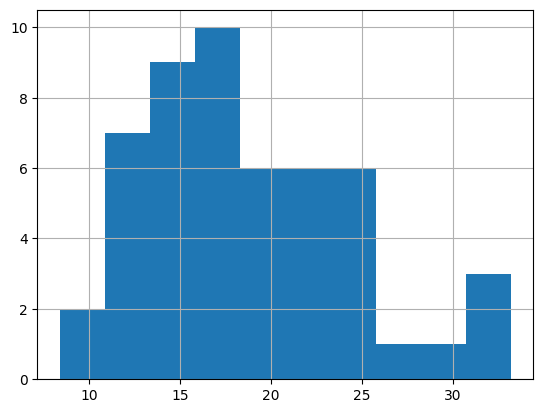

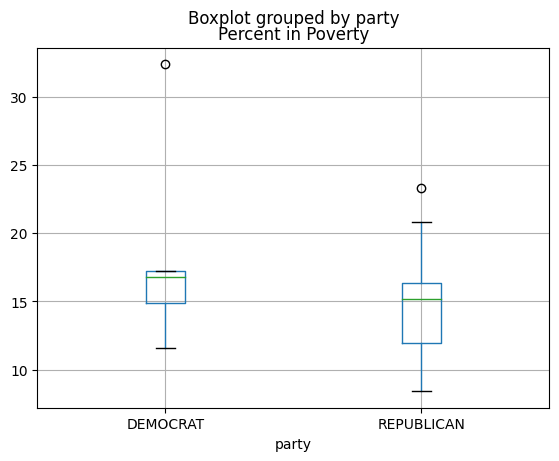

In [ ]:
# EDA
poverty['Percent in Poverty'].hist() # Histogram distribution
print('Mean: ', poverty['Percent in Poverty'].mean() ) # Measures of central tendency
print('Median: ', poverty['Percent in Poverty'].median() )
print('Mode: ', poverty['Percent in Poverty'].mode() )
print(poverty.shape[0]) # 55 rows

merged_df.boxplot(column = 'Percent in Poverty',by = 'party')